# Лабораторная работа 3. Классификация. Нейронные сети
**Цель работы:** изучение методов классификации данных, реализованные в библиотеке Scikit-Learn, а также ознакомление с нейронными сетями с использованием библиотек TensorFlow и TensorBoard.

**Датасет:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

**Описание:** 

Заболевания сердечно-сосудистой системы (ССЗ) являются основной причиной смерти в мире: ежегодно они уносят около 17,9 миллионов человеческих жизней, что составляет 31% всех смертей в мире. Четыре из пяти смертей от ССЗ происходят из-за инфарктов и инсультов, и одна треть этих случаев смерти происходит преждевременно, среди людей в возрасте до 70 лет. Сердечная недостаточность - это распространенное последствие ССЗ, и представленный набор данных содержит 11 признаков, которые можно использовать для прогнозирования возможного заболевания сердца.

| **Переменная** | **Описание** |
| :---: | :--- |
| **Age** | Возраст пациента [годы] |
| **Sex** | Пол пациента [M: мужской, F: женский] |
| **ChestPainType** | Тип боли в груди [TA: Типичная стенокардия, ATA: Атипичная стенокардия, NAP: Неангинальная боль, ASY: Бессимптомное течение] |
| **RestingBP** | Артериальное давление в состоянии покоя [мм рт. ст.] |
| **Cholesterol** | Уровень холестерина в сыворотке крови [мм/дл] |
| **FastingBS** | Уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: в противном случае] |
| **RestingECG** | Результаты электрокардиографии в состоянии покоя [Normal: нормальная, ST: наличие аномалии зубца ST-T (инверсии зубца T и/или подъем или депрессия сегмента ST > 0.05 мВ), LVH: признаки вероятной или определенной гипертрофии левого желудочка по критериям Эстеса] |
| **MaxHR** | Максимальная достигнутая частота сердечных сокращений [числовое значение от 60 до 202] |
| **ExerciseAngina** | Стенокардия, вызванная физической нагрузкой [Y: да, N: нет] |
| **Oldpeak** | Величина депрессии сегмента ST [числовое значение, измеряется в депрессии] |
| **ST_Slope** | Наклон сегмента ST при пиковой нагрузке [Up: восходящий, Flat: плоский, Down: нисходящий] |
| **HeartDisease** | Целевой класс [1: заболевание сердца, 0: норма] |

---

## Загрузка датасета и подготовка данных

In [2]:
import pandas as pd

df = pd.read_csv('..\datasets\heart.csv')

print(df)
print(df.info())

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Artur\AppData\Local\Temp\ipykernel_8776\19163273.py:3: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\datasets\heart.csv')


     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  


---

### Оценка распределения классов:

In [3]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Классы относительно сбалансированны (примерно в соотношении 55/45).

---

### Анализ переменных:

- **Числовые:** Age, RestingBP, Cholesterol, MaxHR, Oldpeak;
- **Категориальные:** Sex, ChestPainType, RestingECG, ExcerciseAngina, ST_Slope;
- **Бинарные:** FastingBS, HeartDisease (целевая).

Категориальные переменные необходимо закодировать, чтобы модели могли работать с этими данными, но т.к. модели могут ошибочно интерпретировать числа как упорядоченные, необходимо для каждого метода использовать предпочтительный вариант кодирования.

Также для некоторых методов необходимо масштабирование данных.

---

### Кодирование категориальных переменных

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

onehot_encoder  = OneHotEncoder(drop='first', sparse_output=False) # first, чтобы избежать dummy trap.
encoded_data = onehot_encoder .fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder .get_feature_names_out(categorical_cols))

df_onehot = pd.concat([df[numerical_cols], encoded_df, df['HeartDisease']], axis=1)

print(df_onehot)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
0     40        140          289          0    172      0.0    1.0   
1     49        160          180          0    156      1.0    0.0   
2     37        130          283          0     98      0.0    1.0   
3     48        138          214          0    108      1.5    0.0   
4     54        150          195          0    122      0.0    1.0   
..   ...        ...          ...        ...    ...      ...    ...   
913   45        110          264          0    132      1.2    1.0   
914   68        144          193          1    141      3.4    1.0   
915   57        130          131          0    115      1.2    1.0   
916   57        130          236          0    174      0.0    0.0   
917   38        138          175          0    173      0.0    1.0   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                  1.0                0.0               0.0   
1                  0.0           

In [5]:
from sklearn.preprocessing import LabelEncoder

df_label = df.copy()
label_encoders = {}

for col in categorical_cols:
    label_encoder = LabelEncoder()
    df_label[col] = label_encoder.fit_transform(df_label[col])
    label_encoders[col] = label_encoder

df_label = pd.concat([df_label[numerical_cols + categorical_cols], df_label['HeartDisease']], axis=1)

print(df_label)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex  \
0     40        140          289          0    172      0.0    1   
1     49        160          180          0    156      1.0    0   
2     37        130          283          0     98      0.0    1   
3     48        138          214          0    108      1.5    0   
4     54        150          195          0    122      0.0    1   
..   ...        ...          ...        ...    ...      ...  ...   
913   45        110          264          0    132      1.2    1   
914   68        144          193          1    141      3.4    1   
915   57        130          131          0    115      1.2    1   
916   57        130          236          0    174      0.0    0   
917   38        138          175          0    173      0.0    1   

     ChestPainType  RestingECG  ExerciseAngina  ST_Slope  HeartDisease  
0                1           1               0         2             0  
1                2           1       

In [6]:
for col in categorical_cols:
    le = label_encoders[col]
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Столбец '{col}':")
    for category, code in mapping.items():
        print(f"  {category} -> {code}")
    print()

Столбец 'Sex':
  F -> 0
  M -> 1

Столбец 'ChestPainType':
  ASY -> 0
  ATA -> 1
  NAP -> 2
  TA -> 3

Столбец 'RestingECG':
  LVH -> 0
  Normal -> 1
  ST -> 2

Столбец 'ExerciseAngina':
  N -> 0
  Y -> 1

Столбец 'ST_Slope':
  Down -> 0
  Flat -> 1
  Up -> 2




---

### Масштабирование числовых признаков

**LDA**, **SVM**, **k-NN** и **нейросети** чувстительны к масштабу признаков, поэтому масштабируем данные для них (используем One-Hot кодирование).

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_onehot_scaled = df_onehot.copy()
df_onehot_scaled[numerical_cols] = scaler.fit_transform(df_onehot_scaled[numerical_cols])

print(df_onehot_scaled)

          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Sex_M  \
0   -1.433140   0.410909     0.825070  -0.551341  1.382928 -0.832432    1.0   
1   -0.478484   1.491752    -0.171961  -0.551341  0.754157  0.105664    0.0   
2   -1.751359  -0.129513     0.770188  -0.551341 -1.525138 -0.832432    1.0   
3   -0.584556   0.302825     0.139040  -0.551341 -1.132156  0.574711    0.0   
4    0.051881   0.951331    -0.034755  -0.551341 -0.581981 -0.832432    1.0   
..        ...        ...          ...        ...       ...       ...    ...   
913 -0.902775  -1.210356     0.596393  -0.551341 -0.188999  0.293283    1.0   
914  1.536902   0.627078    -0.053049   1.813758  0.164684  2.357094    1.0   
915  0.370100  -0.129513    -0.620168  -0.551341 -0.857069  0.293283    1.0   
916  0.370100  -0.129513     0.340275  -0.551341  1.461525 -0.832432    0.0   
917 -1.645286   0.302825    -0.217696  -0.551341  1.422226 -0.832432    1.0   

     ChestPainType_ATA  ChestPainType_NAP  ChestPai


---

## 1. Построение класификационной модели с помощью **Наивного Байесовского классификатора**

### Проверка данных на соответствование требованиям методов

Проверим признаки на соответствие **нормальному распределению**:

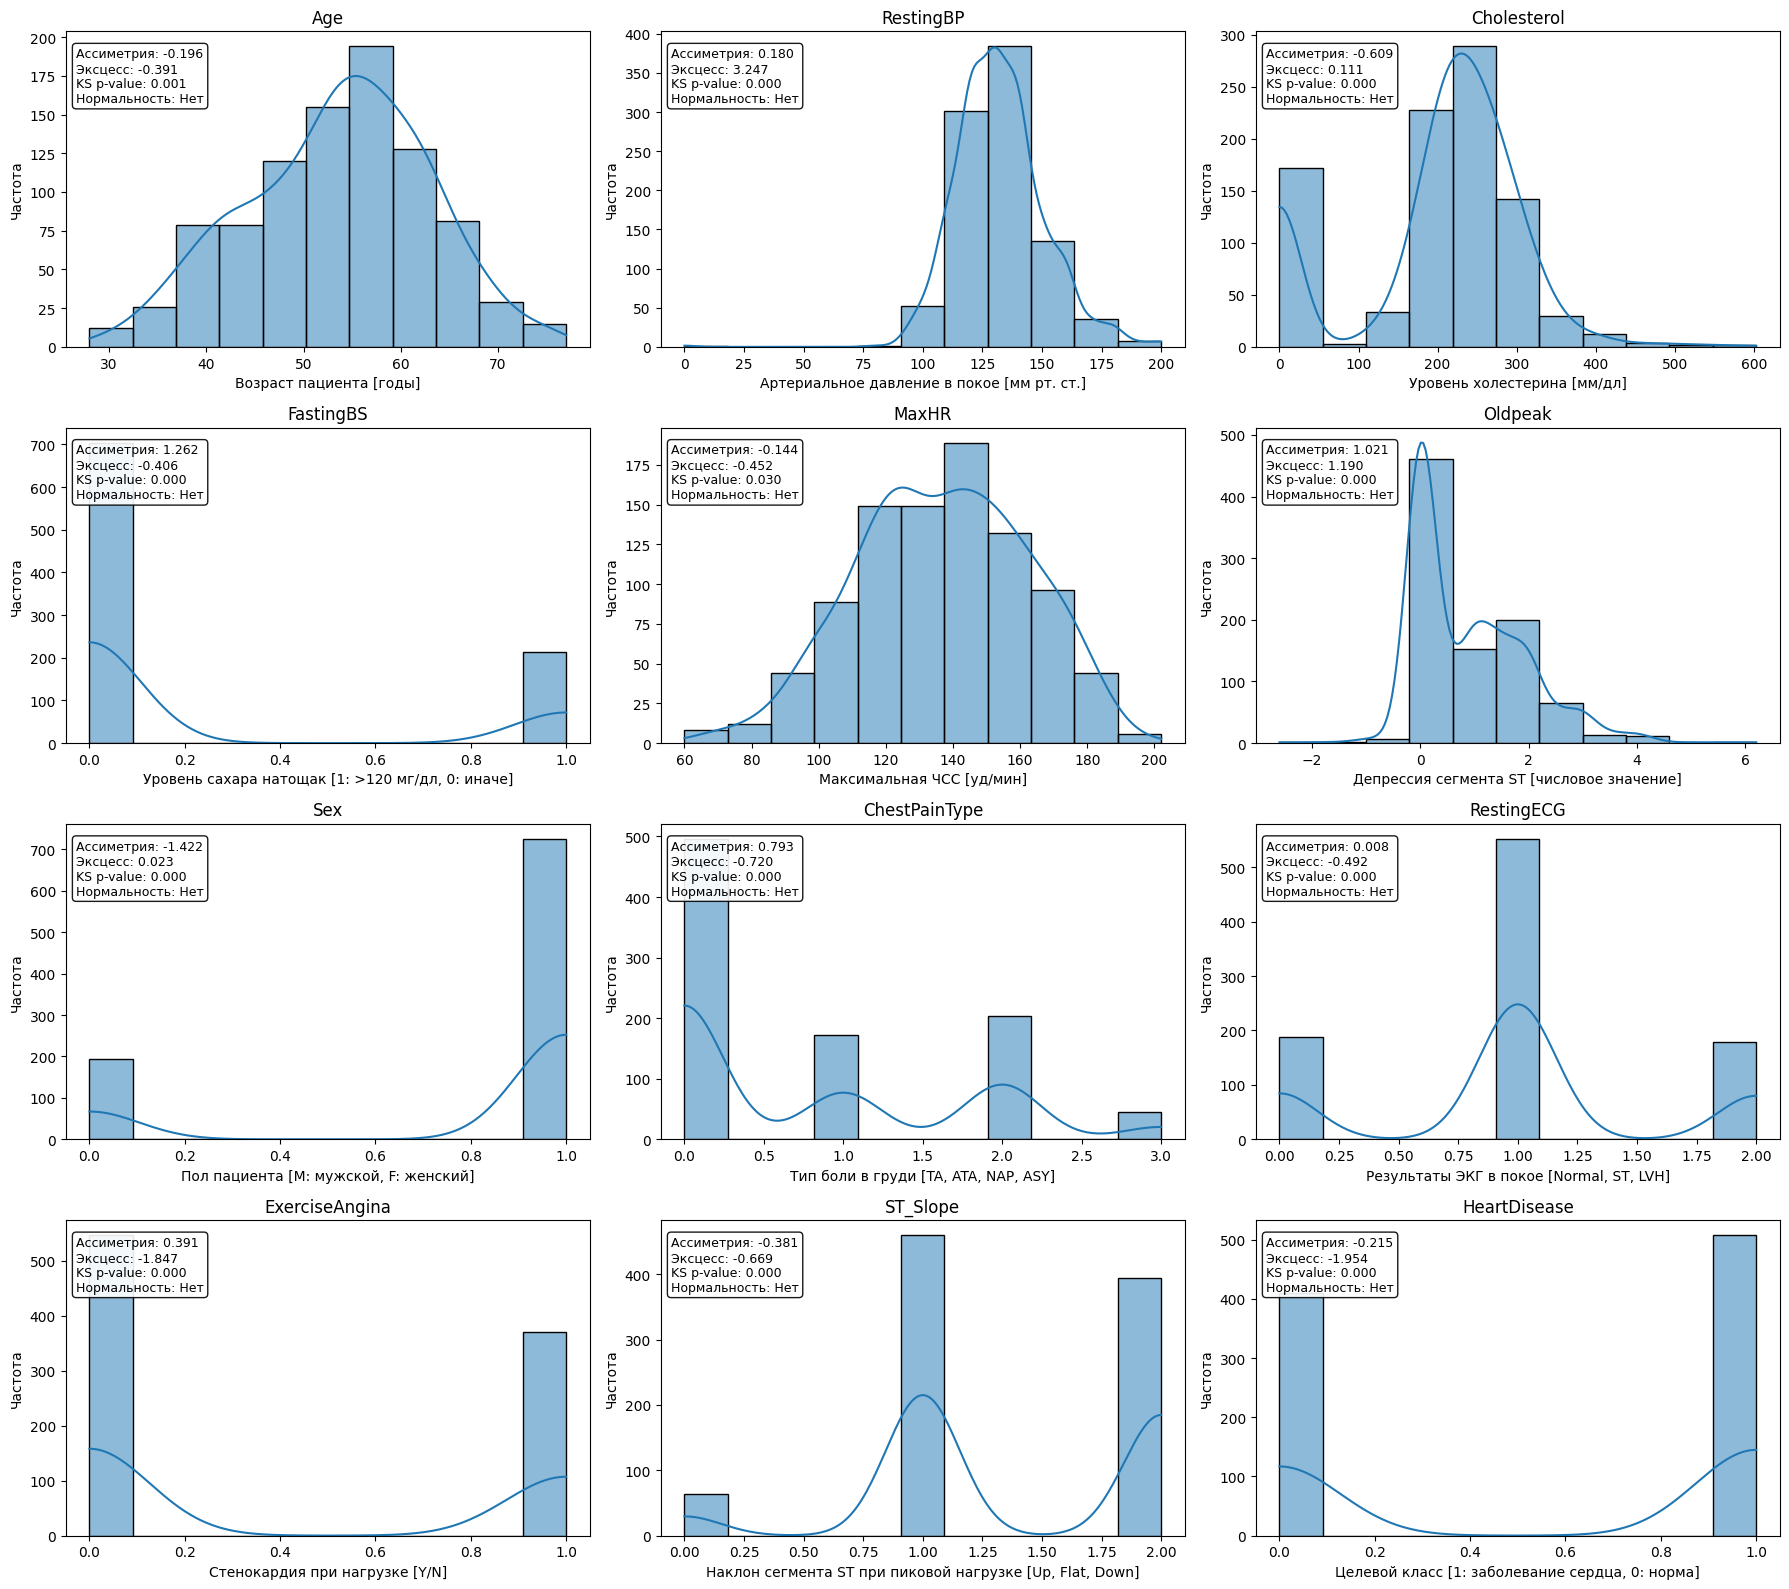

In [8]:
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb
from scipy.stats import skew, kurtosis, kstest

ALPHA = 0.05

# Описание переменных
descriptions = {
    'Age': 'Возраст пациента [годы]',
    'Sex': 'Пол пациента [M: мужской, F: женский]',
    'ChestPainType': 'Тип боли в груди [TA, ATA, NAP, ASY]',
    'RestingBP': 'Артериальное давление в покое [мм рт. ст.]',
    'Cholesterol': 'Уровень холестерина [мм/дл]',
    'FastingBS': 'Уровень сахара натощак [1: >120 мг/дл, 0: иначе]',
    'RestingECG': 'Результаты ЭКГ в покое [Normal, ST, LVH]',
    'MaxHR': 'Максимальная ЧСС [уд/мин]',
    'ExerciseAngina': 'Стенокардия при нагрузке [Y/N]',
    'Oldpeak': 'Депрессия сегмента ST [числовое значение]',
    'ST_Slope': 'Наклон сегмента ST при пиковой нагрузке [Up, Flat, Down]',
    'HeartDisease': 'Целевой класс [1: заболевание сердца, 0: норма]'
}

num_cols = 3
num_rows = int(np.ceil(len(df_label.columns) / num_cols))

fig, axes = plot.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(df_label.columns):
    ax = axes[i]
    
    sb.histplot(df_label[column], kde=True, bins='sturges', ax=ax)
    
    ks_stat, ks_p_value = kstest(df_label[column], 'norm', args=(np.mean(df_label[column]), np.std(df_label[column])))
    
    legend_text = (
        f'Ассиметрия: {skew(df_label[column]):.3f}\n'
        f'Эксцесс: {kurtosis(df_label[column]):.3f}\n'
        f'KS p-value: {ks_p_value:.3f}\n'
        f'Нормальность: {"Да" if ks_p_value >= ALPHA else "Нет"}'
    )
    
    ax.text(0.02, 0.95, legend_text, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.9))
    
    ax.set_title(column)
    ax.set_xlabel(descriptions[column])
    ax.set_ylabel('Частота')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plot.tight_layout()
plot.show()


По полученным данным видно, что признаки не соответсвтуют нормальному распределению. Следовательно, **GaussianNB не подходит**.

- MultinomialNB - для дискретных неотриц. признаков.
- ComplementNB - вариация MultinomialNB, корректирующая несбалансированные классы.
- BernoulliNB - для бинарных признаков.

Т.к. в датасете есть как дискретные, так и числовые признки, то **BernoulliNB тоже не подходит**; **ComplementNB** используется в случае, когда классы сильно несбалансированны - в нашем случае эффект будет минимальным, поэтому воспользуемся **MultinomialNB**.

Для его применения необходимо привести числовые (непрерывные) признаки к дискретным.

---

### Приведение числовых признаков к дискретным

In [9]:
from sklearn.preprocessing import KBinsDiscretizer

df_label_disc = df_label.copy()

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df_label_disc[numerical_cols] = kbins.fit_transform(df_label_disc[numerical_cols]).astype(int)

df_multinomial = pd.concat([df_label_disc[numerical_cols + categorical_cols], df_label_disc['HeartDisease']], axis=1)

print(df_multinomial)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex  \
0      2          7            4          0      7        2    1   
1      4          8            2          0      6        4    0   
2      1          6            4          0      2        2    1   
3      4          6            3          0      3        4    0   
4      5          7            3          0      4        2    1   
..   ...        ...          ...        ...    ...      ...  ...   
913    3          5            4          0      5        4    1   
914    8          7            3          9      5        6    1   
915    5          6            2          0      3        4    1   
916    5          6            3          0      8        2    0   
917    2          6            2          0      7        2    1   

     ChestPainType  RestingECG  ExerciseAngina  ST_Slope  HeartDisease  
0                1           1               0         2             0  
1                2           1       

Теперь можно приступить к построению модели.

---

### Построение модели MultinomialNB

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Лучшие гиперпарамтеры: {'alpha': 0.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}


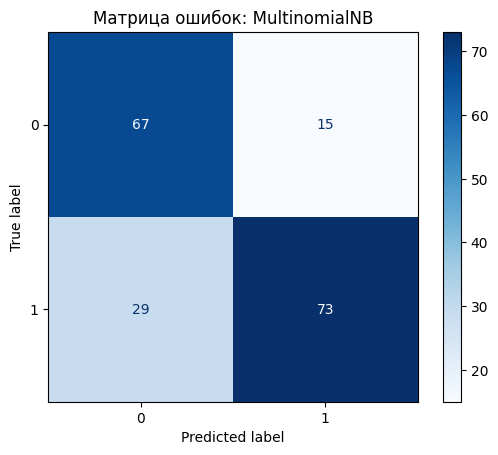

Метрики:
Accuracy: 0.761
Precision: 0.830
Recall: 0.716
F1-score: 0.768
AUC: 0.847


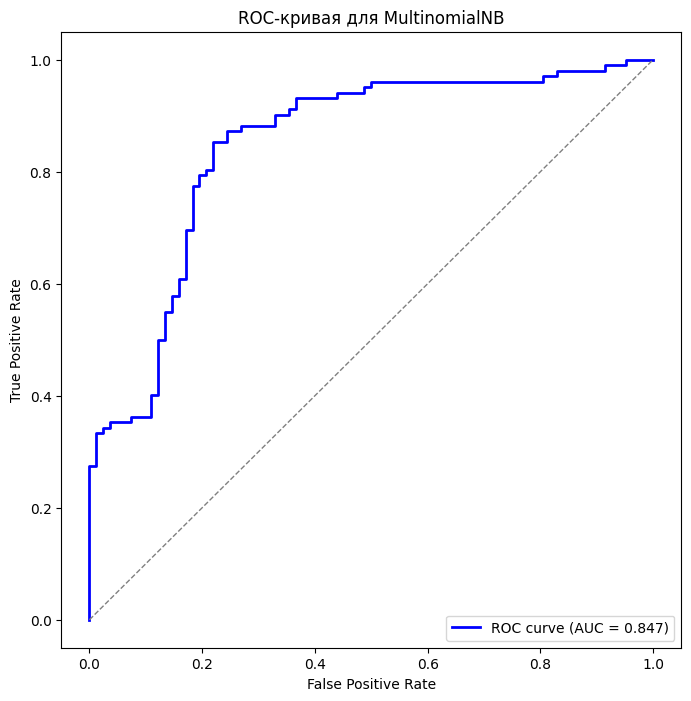

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

X = df_multinomial.drop('HeartDisease', axis=1)
y = df_multinomial['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    'alpha': [0.0, 0.1, 0.5, 1.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.447, 0.553]],
    'force_alpha': [True, False]
}

mnb = MultinomialNB()
grid_search = GridSearchCV(mnb, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

mnb = grid_search.best_estimator_
print('Лучшие гиперпарамтеры:', grid_search.best_params_)

def evaluate_model(model, model_name: str):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plot.cm.Blues)
    plot.title(f'Матрица ошибок: {model_name}')
    plot.show()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print('Метрики:')
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    print(f'AUC: {roc_auc:.3f}')

    plot.figure(figsize=(8,8))
    plot.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plot.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.title(f'ROC-кривая для {model_name}')
    plot.legend(loc="lower right")
    plot.show()

evaluate_model(mnb, 'MultinomialNB')


---

### Анализ результатов
- **Матрица ошибок**: Модель лучше распознаёт здоровых пациентов, чем больных (**FP < FN**; возможно связано с недообучением на больных пациентах);
- **Accuracy**: Модель правильно классифицирует примерно 76% случаев;
- **Precision**: Среди предсказанных положительных случаев большинство действительно положительные;
- **Recall**: Модель пропускает часть положительных случаев - около 28%;
- **F1-score**: Баланс между точностью и полнотой на хорошем уровне;
- **AUC**: Модель хорошо различает классы - высокая способность отделять больных и здоровых пациентов.

Модель работает достаточно эффективно, особенно хорошо контролирует ложноположительные предсказания, но часть больных может быть пропущена (Recall < Precision).

---

## 2. Построение класификационной модели с помощью **Дерева решений**

- Деревья решений могут работать как с числовыми, так и с категориальными признаками;
- Будем использовать **One-Hot Encoding**, т.к. Label Encoding может повлиять на разделение;
- Деревья решений не чувствительны к масштабу признаков, следовательно, стандартизация/нормализация не требуется;
- Деревья чувствительны к дисбалансу классов, поэтому воспользуемся гиперпараметром **class_weight='balanced'** (дисбаланс классов небольшой, методы ресемплинга в данном случае - овершот).

Fitting 5 folds for each of 8064 candidates, totalling 40320 fits
Лучшие гиперпараметры: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}


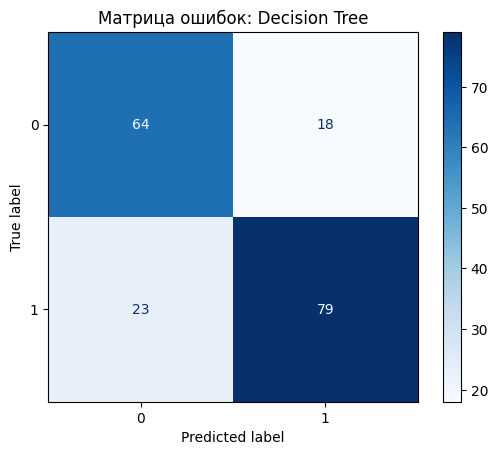

Метрики:
Accuracy: 0.777
Precision: 0.814
Recall: 0.775
F1-score: 0.794
AUC: 0.847


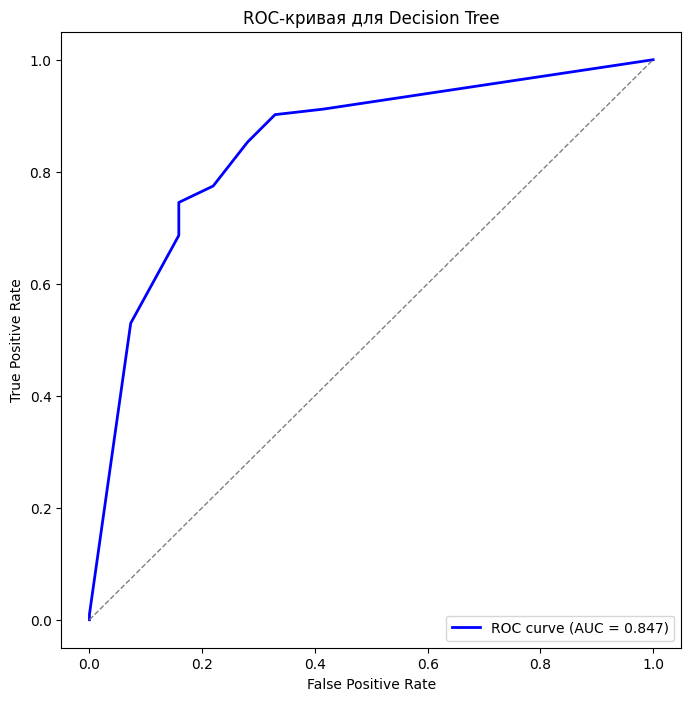

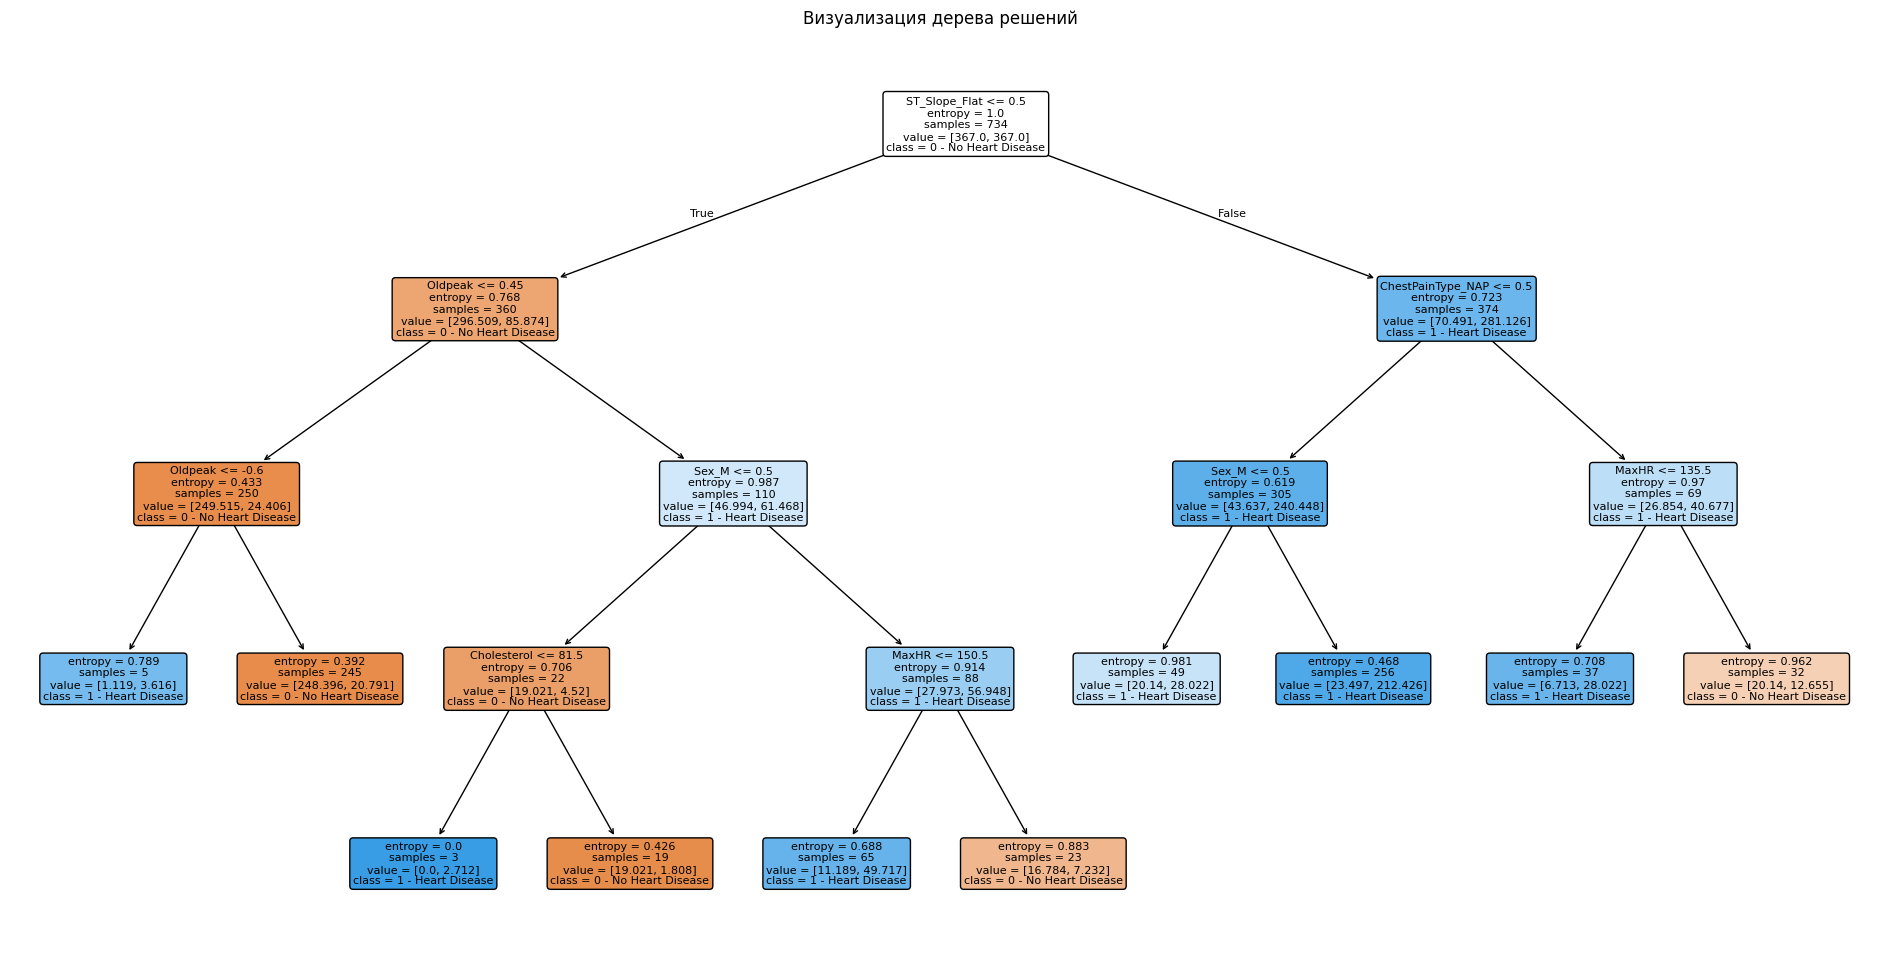

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = df_onehot.drop('HeartDisease', axis=1)
y = df_onehot['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced'],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

dt = grid_search.best_estimator_
print('Лучшие гиперпараметры:', grid_search.best_params_)

evaluate_model(dt, 'Decision Tree')

plot.figure(figsize=(24, 12))
plot_tree(dt, feature_names=X.columns, class_names=['0 - No Heart Disease', '1 - Heart Disease'], filled=True, rounded=True, fontsize=8)
plot.title("Визуализация дерева решений")
plot.show()


---

### Анализ результатов
- **Матрица ошибок**: Модель чаще ошибается, пропуская больных, чем ошибочно диагностируя здоровых, но разница незначительная;
- **Accuracy**: Модель правильно классифицирует около 78% всех случаев;
- **Precision**: Большинство пациентов, у которых модель предсказала болезь, действительно больны;
- **Recall**: Модель обнаруживает ~78% всех больных;
- **F1-score**: Хороший баланс между Precision и Recall, без перекоса;
- **AUC**: Модель отлично справляется с разделением классов на разных порогах вероятности.

Модель дерева решений показывает устойчивую и сбалансированную работу - хорошо выявляет наличие болезени, при этом не слишком часто ошибается с ложными срабатываниями.


---

## 3. Построение класификационной модели с помощью **Линейного дискриминантного анализа**

- LDA требует, чтобы все признаки были числовыми (что уже сделано);
- LDA чувствителен к масштабу признаков, т.к. он использует ковариационную матрицу, поэтому используем **df_onehot_scaled**;
- Необходимо, чтобы признаки были нормально распределены - в нашем случае не выполняется;
- Т.к. LDA вычисляет обратную ковариационную матрицу, то признаки не должны быть линейно зависимы (отсутствие мультиколлинеарности);
- При сильном дисбалансе классов LDA может смещать границу решения в пользу более представленного класса. В нашем случае дисбаланс не сильный, но всё равно воспользуемся параметром **priors**.

---

### Проверка признаков на наличие мультиколлинеарности:

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["feature"] = df_onehot_scaled.columns
vif["VIF"] = [variance_inflation_factor(df_onehot_scaled.values, i) for i in range(df_onehot_scaled.shape[1])]
print(vif.sort_values("VIF", ascending=False))

              feature       VIF
13      ST_Slope_Flat  5.170174
6               Sex_M  4.911394
15       HeartDisease  4.849211
14        ST_Slope_Up  4.600980
10  RestingECG_Normal  3.882571
12   ExerciseAngina_Y  2.645151
11      RestingECG_ST  1.971810
7   ChestPainType_ATA  1.849985
8   ChestPainType_NAP  1.609347
4               MaxHR  1.549722
5             Oldpeak  1.517599
0                 Age  1.384174
2         Cholesterol  1.257093
3           FastingBS  1.176254
9    ChestPainType_TA  1.159065
1           RestingBP  1.117443


Присутствует умеренная мультиколлинеарность, но в целом по этому критерию **данные подходят для LDA**.

**Однако, признаки не соответствуют нормальному распределению, поэтому метод LDA не подходит для классификации по нашим данным**, но построение модели всё равно выполним.

---

### Построение модели LDA

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Лучшие гиперпараметры: {'n_components': None, 'priors': None, 'shrinkage': 0.2, 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}


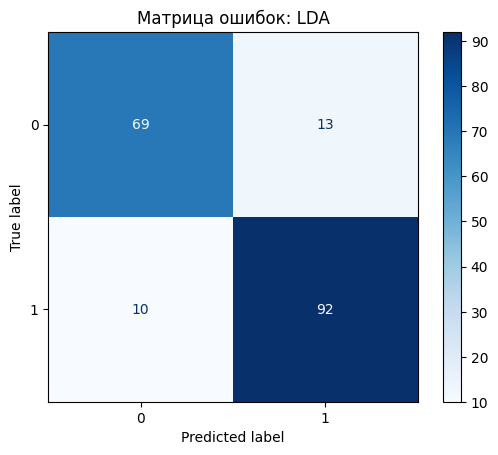

Метрики:
Accuracy: 0.875
Precision: 0.876
Recall: 0.902
F1-score: 0.889
AUC: 0.932


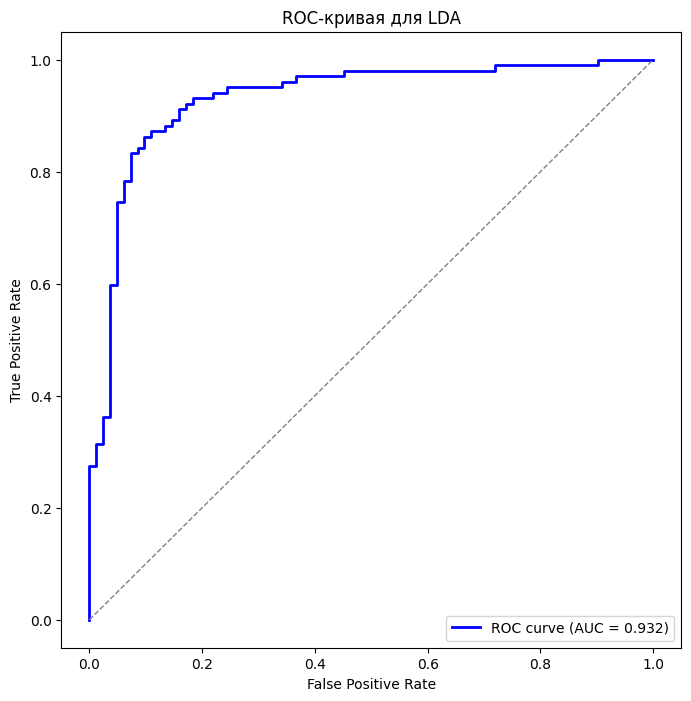

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df_onehot_scaled.drop('HeartDisease', axis=1)
y = df_onehot_scaled['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Сделал так, потому что если solver = 'svd', то shrinkage должен быть None, иначе всё ломается.
param_grid = []

param_grid += [{
    'solver': ['svd'],
    'shrinkage': [None],
    'priors': [None, [0.447, 0.553]],
    'n_components': [None, 1],
    'store_covariance': [True, False],
    'tol': [0.0001, 0.001, 0.01]
}]

param_grid += [{
    'solver': ['lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.0, 0.1, 0.2, 0.5, 1.0],
    'priors': [None, [0.447, 0.553]],
    'n_components': [None, 1],
    'store_covariance': [True, False],
    'tol': [0.0001, 0.001, 0.01]
}]

lda = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

lda = grid_search.best_estimator_
print('Лучшие гиперпараметры:', grid_search.best_params_)

evaluate_model(lda, 'LDA')


---

### Анализ результатов
- **Матрица ошибок**: Наблюдается небольшой перекос в сторону более частой правильной классификации класса больных пациентов, что соответствует выборке;
- **Accuracy**: Модель правильно классифицирует ~88% всех объектов;
- **Precision**: Из всех случаев, когда модель предсказала наличие заболевания, большинство действительно имеет заболевание сердца;
- **Recall**: Модель выявила ~90% всех больных;
- **F1-score**: Модель хорошо сбалансирована между точностью и полнотой, без сильного перекоса в какую-либо сторону;
- **AUC**: Модель имеет низкий риск случайного угадывания и уверенно отделяет положительный класс от отрицательного.

Модель LDA показывает высокую точность, чувствительность и отличное разделение классов, особенно хорошо выявляя положительные случаи.

Даже не смотря на то, что нарушаются требования к данным, LDA выдал пока что наилучший результат из всех методов решения задачи классификации, видимо, из-за того, что данные имеют линейно различимые классы, и метод строит линейную границу

---

## 4. Построение класификационной модели с помощью **Метода опорных векторов**

- SVM работает с числовыми признаками;
- Крайне важно масштабировать признаки, потому что SVM использует евклидово расстояния для построение границы (будем использовать **df_onehot_scaled**);
- SVM чувствителен к дисбалансу классов (будем использовать **class_weight='balanced'**)
- SVM ищет максимально широкую разделяющую гиперплоскость. Если классы нелинейно разделимы, то нужно использовать ядра (kernel).

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Лучшие гиперпараметры: {'C': 0.1, 'class_weight': 'balanced', 'coef0': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': True, 'shrinking': True, 'tol': 0.001}


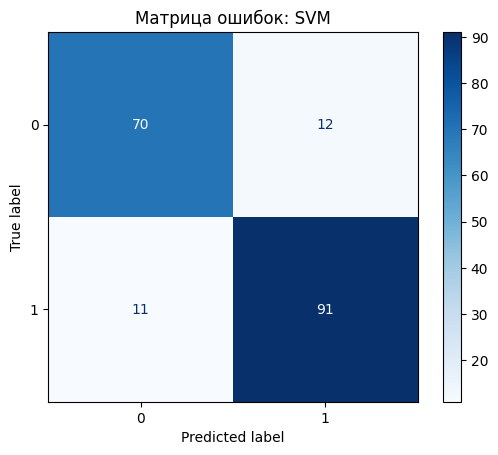

Метрики:
Accuracy: 0.875
Precision: 0.883
Recall: 0.892
F1-score: 0.888
AUC: 0.936


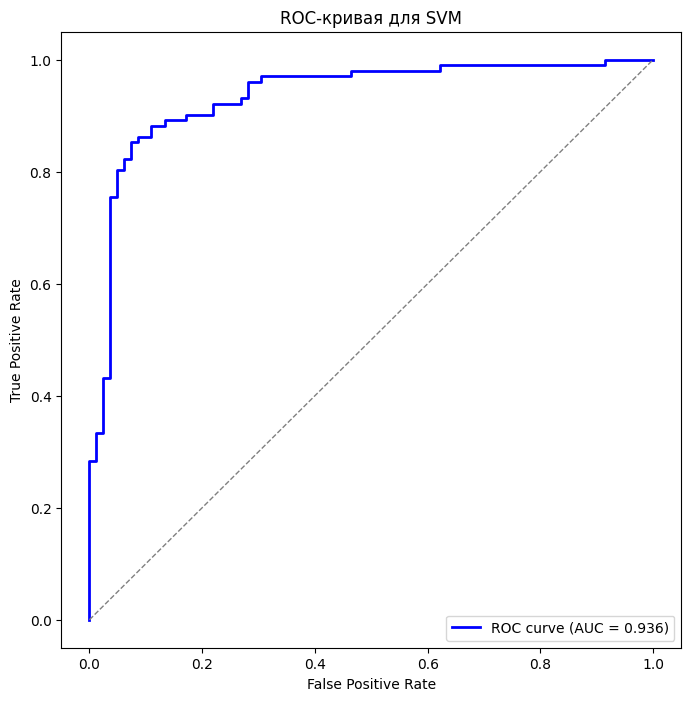

In [14]:
from sklearn.svm import SVC

X = df_onehot_scaled.drop('HeartDisease', axis=1)
y = df_onehot_scaled['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid ={
    'C': [0.1, 0.5, 1, 5, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.1, 0.5, 1.0],
    'shrinking': [True, False],
    'probability': [True],
    'tol': [1e-3, 1e-4],
    'class_weight': ['balanced'],
    'max_iter': [-1]
}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

svm = grid_search.best_estimator_
print('Лучшие гиперпараметры:', grid_search.best_params_)

evaluate_model(svm, 'SVM')


---

### Анализ результатов
- **Матрица ошибок**: Большинство наблюдений классифицированы верно, что говорит о хорошей обобщающей способности модели. Ошибки почти симметричны;
- **Accuracy**: ~88% всех объектов классифицированы правильно;
- **Precision**: 88% предсказаний наличия заболевания действительно верны;
- **Recall**: Модель находит около 89% всех реально больных, это говорит о том, что алгоритм не пропускает большинство случаев заболевания;
- **F1-score**: Отличное равновесие между точностью и полнотой: модель не только успешно выявляет большинство больных, но и делает это с минимальным числом ложных срабатываний;
- **AUC**: Очень высокая способность разделять классы: модель уверенно различает больных и здоровых пациентов практических во всех диапазонах порогов вероятности.

Модель SVM устойчива и сбалансирована - одинаково хорошо справляется с выявлением больных и минимизацией ложных тревог, а высокий AUC говорит об отличной дискриминирующей способности модели.

---

## 5. Построение класификационной модели с помощью **Метода ближайших соседей (k-Nearest Neighbors)**


In [15]:
import pandas as pd

num_cols = df_onehot_scaled.select_dtypes(include=['float64', 'int64']).columns

outlier_info = {}

for col in num_cols:
    Q1 = df_onehot_scaled[col].quantile(0.25)
    Q3 = df_onehot_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_onehot_scaled[(df_onehot_scaled[col] < lower_bound) | (df_onehot_scaled[col] > upper_bound)]
    outlier_info[col] = len(outliers)

outlier_summary = pd.DataFrame.from_dict(outlier_info, orient='index', columns=['Количество выбросов'])
outlier_summary.sort_values('Количество выбросов', ascending=False)


,Количество выбросов
FastingBS,214
ChestPainType_NAP,203
Sex_M,193
Cholesterol,183
RestingECG_ST,178
ChestPainType_ATA,173
ChestPainType_TA,46
RestingBP,28
Oldpeak,16
MaxHR,2


Большая часть с высоким кол-вом выбросов - бинарные/закодированные категориальные переменные: выбросы здесь - артефакт IQR (метод считает "1" или "0" редким при распределении).

Но числовые значения с большим кол-вом выбросов - это проблема: экстремальные значения могут реально повлиять на kNN.

**Воспользуемся RobustScaler вместо стандартного, чтобы избавиться от выбросов для числовых (непрерывных признаков)**

---

### Построение модели kNN

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
Лучшие гиперпараметры: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 13, 'p': 2, 'weights': 'distance'}


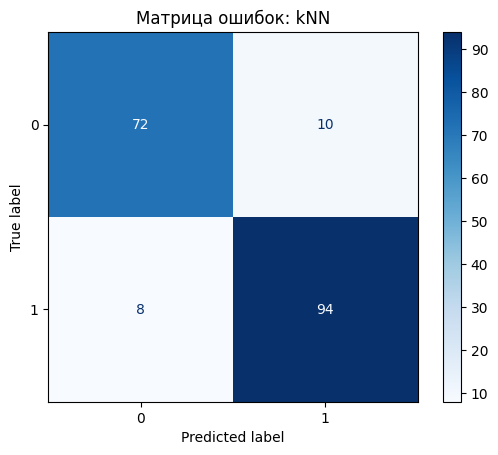

Метрики:
Accuracy: 0.902
Precision: 0.904
Recall: 0.922
F1-score: 0.913
AUC: 0.939


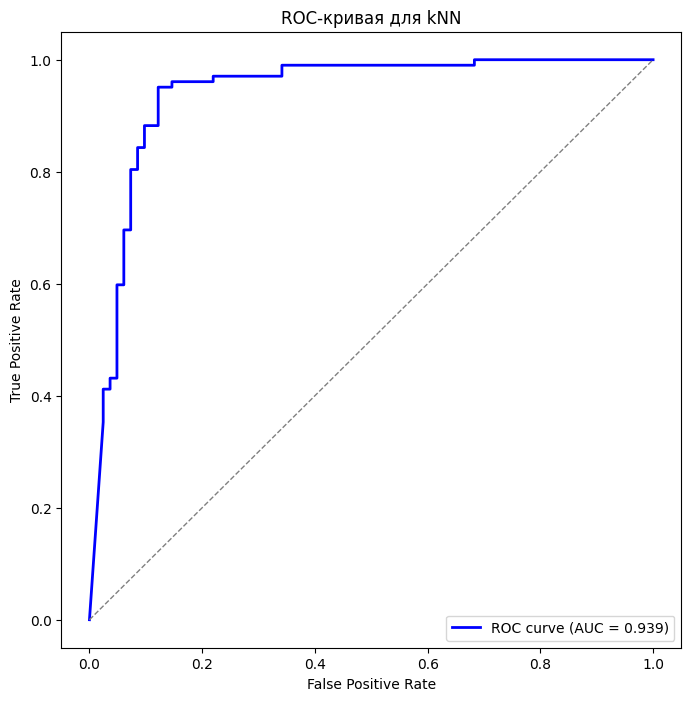

In [16]:
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier

X = df_onehot_scaled.drop('HeartDisease', axis=1).copy()
y = df_onehot_scaled['HeartDisease']

continuous_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

for col in continuous_features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)

scaler = RobustScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(10, 51, 5)),
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'metric_params': [None],
    'n_jobs': [-1]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

knn = grid_search.best_estimator_
print('Лучшие гиперпараметры:', grid_search.best_params_)

evaluate_model(knn, 'kNN')



---

### Анализ результатов
- **Матрица ошибок**: Модель правильно классифицировала большинство наблюдений;
- **Accuracy**: Модель правильно классифицирует около 90% всех примеров;
- **Precision**: ~90% предсказанных положительных случаев действительно являются положительными;
- **Recall**: Модель находит ~92% всех реальных положительных случаев;
- **F1-score**: Такое высокое значение (0.913) демонстрирует, чтьо модель эффективно балансирует между минимизацией ложноположительных и ложноотрицательных ошибок;
- **AUC**: Очень высокое качество классификации - модель отлично различает классы при изменении порога вероятности.

kNN после обработки выбросов и масштабирования работает очень эффективно для данного набора данных, превосходя по метрика ранее построенные модели. Она сбалансирована и надёжка как для выявления больных пациентов, так и для классификации здоровых.

---

## Сравнение качества работы классификаторов

| **Классификатор** | **Accuracy** | **Precision** | **Recall** | **F1-Score** | **AUC** |
|:---|:---:|:---:|:---:|:---:|:---:|
| **MultinomialNB** | 0.761 | 0.830 | 0.716 | 0.768 | 0.847 |
| **Decision Tree** | 0.777 | 0.814 | 0.775 | 0.794 | 0.847 |
| **LDA** | 0.875 | 0.876 | 0.902 | 0.889 | 0.932 |
| **SVM** | 0.875 | 0.883 | 0.892 | 0.888 | 0.936 |
| **kNN** | 0.902 | 0.904 | 0.922 | 0.913 | 0.939 |

1. **kNN - Лучший классификатор по всем метрикам**:
    - Наилучшие Accuracy, F1-score, AUC, высокие Precision и Recall;
    - После обработки выбросов и масштабирования kNN отлично нашёл соседние структуры в данных.
2. **LDA и SVM - очень близкие по качеству и существенно лучше MultinomialNB и Decision Tree**:
    - LDA показала высокие Recall и AUC, несмотря на формальное нарушение предпосылок нормальности - данные оказались почти линейно разделимы;
    - SVM даёт чуть более высокий AUC и Precision, показывает устойчивое качество.
3. **Decision Tree - легко интерпретируемый, но уступающий по качеству**:
    - Показатели средние: дерево требует регуляризации/ансамблевые методы (например: Random Forest, Gradient Boosting) для повышения стабильности, но в целом удобен для понимания правил принятия решений.
4. **MultinomialNB - базовая модель, хуже всех остальных**:
    - Показала худшие результаты из-за того, что признаки не удовлетворяют предположениям модели: они не полностью дискретные и не являются условно независимыми.

---

## Исследование влияния различных параметров на качество классификации

Для задания оптимальных гиперпараметров использовался подбор через **GridSearchCV**. Рассмотрим каждый из ключевых гиперпараметров каждого метода.

---

### **MultinomialNB**

- alpha - сглаживание Лапласа. Защищает от нулевых вероятностей;
- fit_prior - использовать ли априорные вероятности классов или считать их равными.

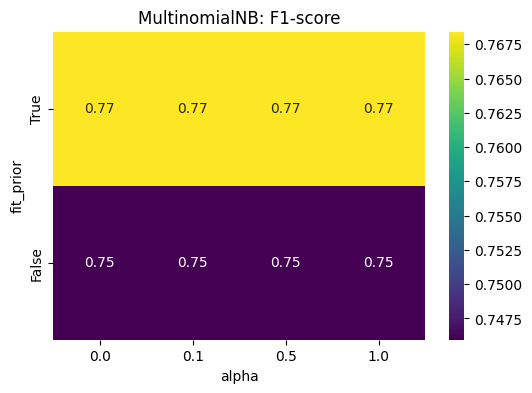

In [17]:
import itertools

alphas = [0.0, 0.1, 0.5, 1.0]
fit_priors = [True, False]
results_nb = []

X = df_multinomial.drop('HeartDisease', axis=1)
y = df_multinomial['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

for alpha, fit_prior in itertools.product(alphas, fit_priors):
    nb = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    results_nb.append((alpha, fit_prior, f1_score(y_test, y_pred)))

f1_matrix = np.array([[r[2] for r in results_nb if r[1]==fp] for fp in fit_priors])
plot.figure(figsize=(6,4))
sb.heatmap(f1_matrix, annot=True, xticklabels=alphas, yticklabels=fit_priors, cmap='viridis')
plot.xlabel('alpha')
plot.ylabel('fit_prior')
plot.title('MultinomialNB: F1-score')
plot.show()
plot.show()

Значения на диаграмме не меняются, поскольку alpha влияет только на сглаживание вероятностей для редких признаков. В нашем датасете признаки дискретные (мы привели их к этому виду) и достаточно частотные, поэтому изменение alpha почти не меняет предсказания. 

Аналогично, fit_prior не влияет сильно, т.к. классы относительно сбалансированы.

---

### **Decision Tree**

- max_depth - максимальная глубина дерева;
- min_samples_split - минимальное число образцов для разбиения узла;
- min_samples_leaf - минимальное число образцов в листе.

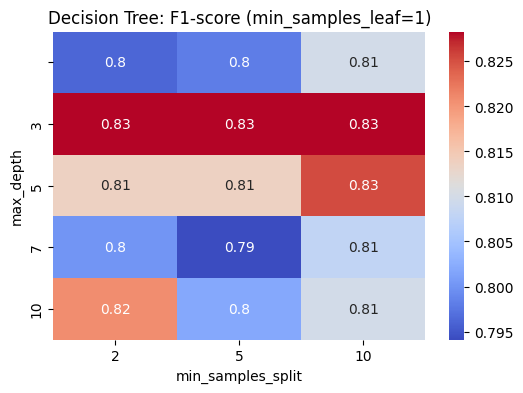

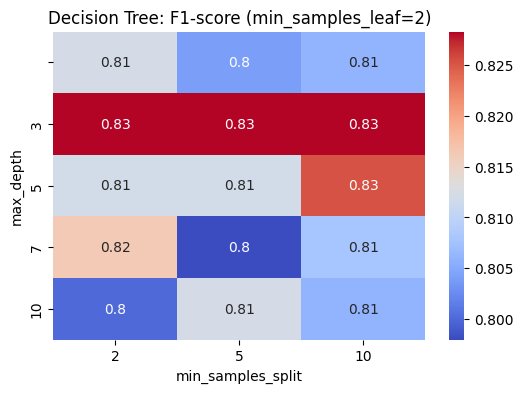

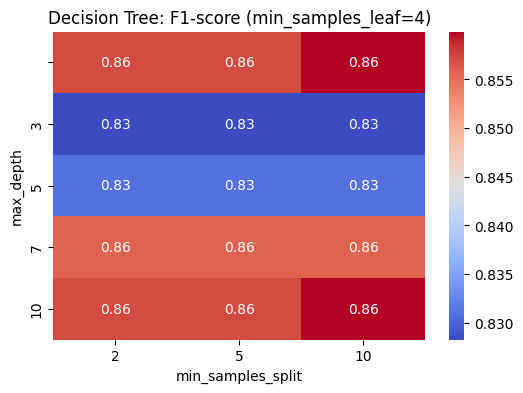

In [18]:
max_depths = [None, 3, 5, 7, 10]
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 4]
results_dt = []

X = df_onehot.drop('HeartDisease', axis=1)
y = df_onehot['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

for depth, split, leaf in itertools.product(max_depths, min_samples_splits, min_samples_leafs):
    dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, class_weight='balanced', random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    results_dt.append((depth, split, leaf, f1_score(y_test, y_pred)))

for leaf_fixed in min_samples_leafs:
    matrix_dt = np.zeros((len(max_depths), len(min_samples_splits)))
    for i, d in enumerate(max_depths):
        for j, s in enumerate(min_samples_splits):
            fscores = [r[3] for r in results_dt if r[0]==d and r[1]==s and r[2]==leaf_fixed]
            matrix_dt[i,j] = np.mean(fscores)
    plot.figure(figsize=(6,4))
    sb.heatmap(matrix_dt, annot=True, xticklabels=min_samples_splits, yticklabels=max_depths, cmap='coolwarm')
    plot.xlabel('min_samples_split')
    plot.ylabel('max_depth')
    plot.title(f'Decision Tree: F1-score (min_samples_leaf={leaf_fixed})')
    plot.show()

Увеличение min_samples_leaf до умеренных значений улучшает обобщающую способность дерева и повышает F1-score, а оптимальная комбинация max_depth и min_samples_split зависит от конкретной структуры данных. 

Слишком маленькие листья дают более шумные модели, а слишком большие - могут недообучать.

---

### **LDA**
- solver - метод решения ('svd', 'lsqr', 'eigen');
- shrinkage - коэффициент регуляризации ковариационной матрицы (не используется для 'lsqr' и 'eigen');
- priors - априорные вероятности классов;
- n_components - кол-во дискриминантных компонент **(на наших данных возможно либо None, либо 1)**.

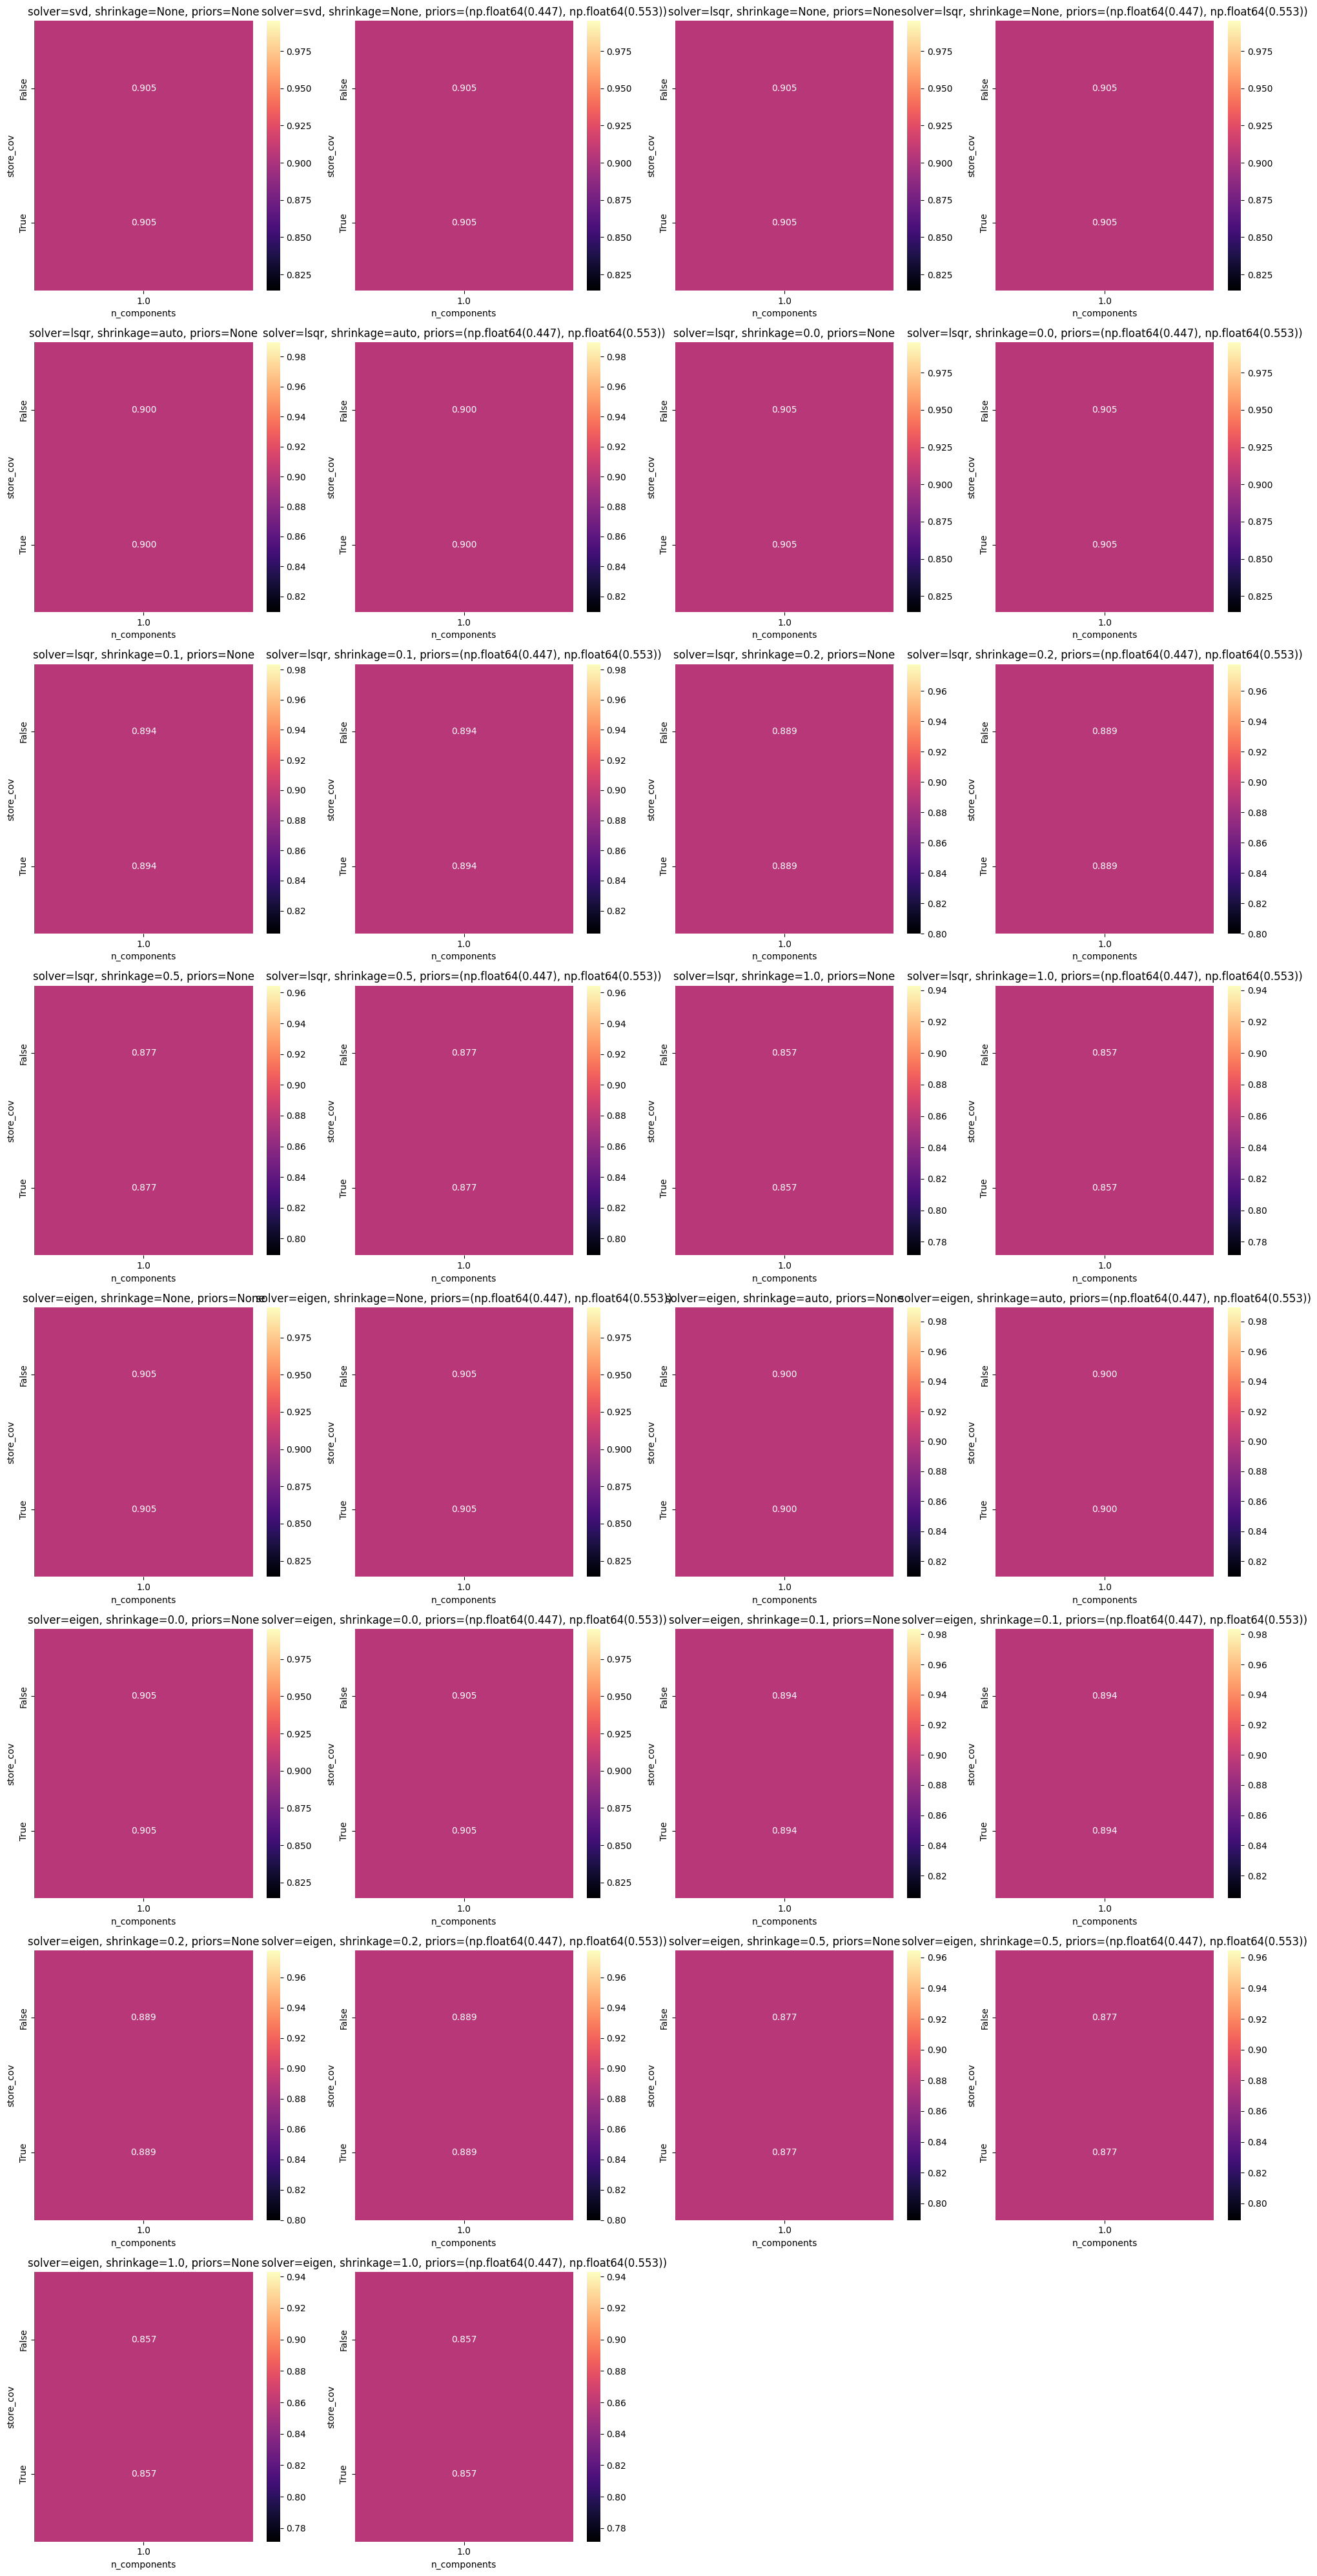

In [26]:
X = df_onehot_scaled.drop('HeartDisease', axis=1)
y = df_onehot_scaled['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

solvers = ['svd', 'lsqr', 'eigen']
shrinkages = [None, 'auto', 0.0, 0.1, 0.2, 0.5, 1.0]
n_components_list = [None, 1]
store_covariances = [True, False]
priors_list = [None, np.array([0.447, 0.553])]
tols = [0.0001, 0.001, 0.01]

results = []

for solver in solvers:
    if solver == 'svd':
        valid_shrinkages = [None]
    else:
        valid_shrinkages = shrinkages

    for shrinkage in valid_shrinkages:
        for n_comp in n_components_list:
            for store_cov in store_covariances:
                for priors in priors_list:
                    for tol in tols:
                        lda = LinearDiscriminantAnalysis(
                            solver=solver,
                            shrinkage=shrinkage,
                            n_components=n_comp,
                            store_covariance=store_cov,
                            priors=priors,
                            tol=tol
                        )
                        try:
                            lda.fit(X_train, y_train)
                            y_pred = lda.predict(X_test)
                            f1 = f1_score(y_test, y_pred)
                            results.append({
                                'solver': solver,
                                'shrinkage': shrinkage,
                                'n_components': n_comp,
                                'store_cov': store_cov,
                                'priors': None if priors is None else tuple(priors),
                                'tol': tol,
                                'f1': f1
                            })
                        except:
                            continue

df_results = pd.DataFrame(results)

def create_matrix(df, x_param, y_param, fixed_params):
    df_filtered = df.copy()
    for key, val in fixed_params.items():
        if val is None:
            df_filtered = df_filtered[df_filtered[key].isnull()]
        else:
            df_filtered = df_filtered[df_filtered[key] == val]
    if df_filtered.empty:
        return None, None, None
    x_values = sorted(df_filtered[x_param].dropna().unique())
    y_values = sorted(df_filtered[y_param].dropna().unique())
    matrix = np.zeros((len(y_values), len(x_values)))
    for i, y_val in enumerate(y_values):
        for j, x_val in enumerate(x_values):
            subset = df_filtered[(df_filtered[x_param] == x_val) & (df_filtered[y_param] == y_val)]
            matrix[i, j] = subset['f1'].mean() if not subset.empty else np.nan
    return matrix, x_values, y_values

param_pairs = [('n_components', 'store_cov')]
fixed_params_list = []
for solver in solvers:
    shrink_list = [None] if solver == 'svd' else shrinkages
    for shrink in shrink_list:
        for priors in priors_list:
            fixed_params_list.append({'solver': solver, 'shrinkage': shrink, 'priors': None if priors is None else tuple(priors)})

n_plots = len(fixed_params_list)
cols = 4
rows = int(np.ceil(n_plots / cols))

fig, axes = plot.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()

for idx, fixed in enumerate(fixed_params_list):
    for x_param, y_param in param_pairs:
        matrix, x_values, y_values = create_matrix(df_results, x_param, y_param, fixed)
        if matrix is not None:
            sb.heatmap(matrix, annot=True, fmt=".3f", xticklabels=x_values, yticklabels=y_values,
                       cmap='magma', ax=axes[idx])
            title_fixed = ", ".join([f"{k}={v}" for k,v in fixed.items()])
            axes[idx].set_title(title_fixed)
            axes[idx].set_xlabel(x_param)
            axes[idx].set_ylabel(y_param)
        else:
            axes[idx].axis('off')

for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plot.tight_layout()
plot.show()

- solver - выбирает способ вычисления, влияет на точность и скорость обучения;
- shrinkage - регуляризирует ковариацию, уменьшает переобучение на маленьких выборках. Слишком большая регуляризация может ухудшить классификацию;
- priors - корректирует смещение при дисбалансе классов, улучшая Recall для менее представленного класса;
- n_components - меньшее кол-во уменьшает шум, большее - сохраняет больше информации;
- store_covariance - влияет на возможность анализа ковариации после обучения (напрямую не влияет на метрики).

---

### SVM

- C - параметр регуляризации (контролирует допуск к ошибкам);
- kernel - ядро ('linear', 'poly', 'rbf', 'sigmoid');
- gamma - коэффициент для некоторых ядер;
- class_weight - учитывает дисбаланс классов.

- 

---

### kNN

- n_neighbors - число ближайших соседей;
- weights - как учитывать соседей ('uniform', 'distance');
- algorithm - метод поиска соседей ('auto', 'ball_tree', 'kd_tree', 'brute');
- leaf_size - размер листа в деревьях поиска;
- p - степень для метрики Минковского (1 — манхэттен, 2 — евклид);
- metric - метрика расстояния.